# Session 2: Vector Data Analysis and Map Projection
*Written by Men Vuthy, 2021*

---

#### Overview:

In this session, we will learn about reading and exporting spatial data `Shapefile` and how to deal with map projections in Python by using `Geopandas` and `pyproj` modules and some useful data management functionalities.

After this session, you will understand how to:
* Read and write vector data
* Create geometries into GeoDataFrame
* Change the coordinate reference system of the data

**Downloading data**

The data used in this session is *Provincial population census 2019 of Cambodia* which shows the total population, total population of males and females, total households, household size, density and areas by provinces in the Kingdom of Cambodia. This data is provided for free by [OpenDevelopementCambodia](https://opendevelopmentcambodia.net). Read more about this [dataset](https://data.opendevelopmentcambodia.net/dataset/population-census-2019-provisional-population-totals)

Dataset: 

* [Shapefile](https://data.opendevelopmentmekong.net/dataset/2aaa4d7b-72b3-46d3-979e-8f30e4d801bd/resource/8d44398c-9d2c-4b8a-9194-b9d29774fc41/download/provisional_census2019.zip)
* [GeoJSON](https://data.opendevelopmentmekong.net/dataset/2aaa4d7b-72b3-46d3-979e-8f30e4d801bd/resource/bba28f46-a5e8-498c-b465-de2163a8f5b9/download/provisional_census2019.geojson)
           


### 1. Introduction to Geopandas

`Geopandas` is a module to ease the work with geospatial data in Python easier. This module is extended from `pandas` module to allow spatial operations on geometric objects. In previous session, geometric operations are performed by `shapely`, but `Geopandas` further depends on `fiona` for file access and `matplotlib` for plotting. It actually combines the capabilities of `pandas` and `shapely`, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. More details about `GeoPandas` is available [here] (https://geopandas.org).

#### 1.a. Reading vector files

The first step in analysis pipline is mostly reading the input data. The most common dataformats in GIS includes [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), and [kml or kmz](https://en.wikipedia.org/wiki/Keyhole_Markup_Language). In this section, we will apply various functions from `Geopandas` to read these input files for analysis. The main fuction for reading input data is `gpd.read_file()`, let's see how to use it:

In [1]:
# Import necessary modules
import geopandas as gpd

**Reading a shapefile**

In [2]:
# Set filepath
fp = "data/provisional_census2019/provisional_census2019.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [3]:
data.head()

,ogc_fid,pro_code,province_k,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry
0,1,4,ááááááááá¶áá,Kampong Chhnang,122925.0,251895.0,274037.0,525932.0,4.3,5521,95,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((440280.561 1383585.909, 440090..."
1,2,8,ááááá¶á,Kandal,273111.0,580129.0,615418.0,1195547.0,4.4,3179,376,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((481223.477 1313362.233, 481407.227 1..."
2,3,12,ááááááá,Phnom Penh,399203.0,1039192.0,1090179.0,2129371.0,5.3,679,3136,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((491536.140 1297379.094, 491748.953 1..."
3,4,14,ááááááá,Prey Veng,227008.0,501346.0,556082.0,1057428.0,4.7,4883,217,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((536011.301 1311635.984, 536169.301 1..."
4,5,20,áááá¶áááá,Svay Rieng,131937.0,249446.0,275108.0,524554.0,4.0,2966,177,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((587996.231 1282290.102, 588224.731 1..."


**Reading a GeoJSON file**

In [4]:
# Set filepath
fp = "data/provisional_census2019/provisional_census2019.geojson"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [5]:
data.head(3)

,ogc_fid,pro_code,province_k,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry
0,1,4,កំពង់ឆ្នាំង,Kampong Chhnang,122925.0,251895.0,274037.0,525932.0,4.3,5521,95,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((440280.561 1383585.908, 440090..."
1,2,8,កណ្តាល,Kandal,273111.0,580129.0,615418.0,1195547.0,4.4,3179,376,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((481223.477 1313362.233, 481407..."
2,3,12,ភ្នំពេញ,Phnom Penh,399203.0,1039192.0,1090179.0,2129371.0,5.3,679,3136,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((491536.140 1297379.094, 491748..."


We have read the input data with `Geopandas` fuction into variable `data`. Our data consists of multiple columns, but the most important is <span style="color:red">'geometry'</span> column at the last. As we can see, the type of geometry in this <span style="color:green">'geometry'</span> is MULTIPOLYGON.

In [6]:
# Check the type of data
type(data)

geopandas.geodataframe.GeoDataFrame

We can see that the type of data is `geopandas.geodataframe`. As mentioned above, this type of data will allow us to handle spatial data easier by using similar approaches and datastructures in `Pandas`. Furthermore, we will be able to analyze features and operate functions in a way without the need of GIS application.

#### 1.b. Plotting vector files

Besides reading in dataframe, you can also quickly plot the data based on its shapes or geometries by using `.plot()` fuction from geopandas because `Geopandas` provides a high-level interface to the `matplotlib` library for making maps. 

<AxesSubplot:>

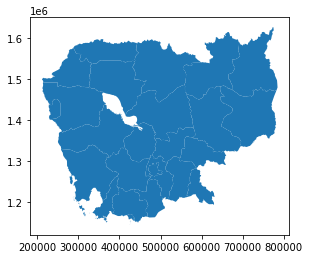

In [7]:
data.plot()

***Plotting map of GeoPandas data (optional)***

Read more about plotting [geopandas.GeoDataframe](https://geopandas.org/docs/user_guide/mapping.html).

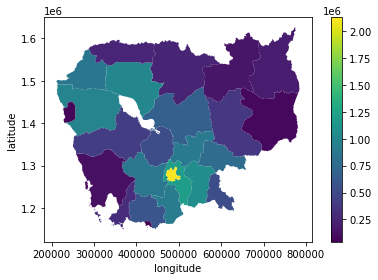

In [8]:
import matplotlib.pyplot as plt

# input data for plotting
data.plot(column='total', legend=True, cmap='viridis')

# set label x and y
plt.xlabel('longitude')
plt.ylabel('latitude')

# Remove empty white space around the plot
plt.tight_layout()

# save figure (jpg, png, pdf, etc)
plt.savefig('result/cambo_pop.png', dpi = 150)  # dpi is for setting image quality

plt.show();

#### 1.c. Analyzing vector file

After importing input data, we can do some small analyses based on its attribute table. Now, let's see what we can do:

In [9]:
# Check projection of data by using .crs
data.crs 

{'init': 'epsg:32648'}

In [10]:
# Check all column names
data.columns.values

array(['ogc_fid', 'pro_code', 'province_k', 'provinces', 'households',
       'males', 'females', 'total', 'house_size', 'area_km2', 'pop_km2',
       'reference', 'geometry'], dtype=object)

In [11]:
# Check the number of rows or length of data
len(data)

25

In [12]:
# Select Phnom Penh
data.loc[data['province_k'] == 'ភ្នំពេញ'] # or data.loc[data['provinces'] == 'Phnom Penh']

,ogc_fid,pro_code,province_k,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry
2,3,12,ភ្នំពេញ,Phnom Penh,399203.0,1039192.0,1090179.0,2129371.0,5.3,679,3136,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((491536.140 1297379.094, 491748..."


So let's check the shape of each multipolygon and the data type

In [13]:
# Check the type of geometry
type(data['geometry'][2])

shapely.geometry.multipolygon.MultiPolygon

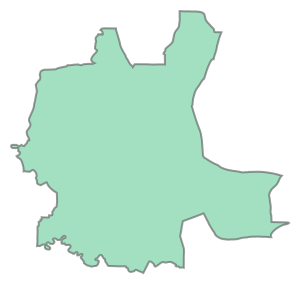

In [14]:
# Check the shape of each multipolygon or polygon by changing the number in the [] for the specific province
data['geometry'][2] # or data.at[2, 'geometry']

In [15]:
# Calculate area of polygon in square km
area_pp = data['geometry'][2].area/1000000
area_pp

684.3447598239339

In [16]:
# Let's create a new column for area and calculate area of all polygons in km2 using dataframe.area 
data['area'] = data.area/1000000

print(data['area'].head(3))

0    5295.150767
1    3253.310484
2     684.344760
Name: area, dtype: float64


Let’s check what is the min, max and mean of those areas using common functions we used to know.

In [17]:
# Maximum area
max_area = data['area'].max()

# Minimum area
min_area = data['area'].min()

# Mean area
mean_area = data['area'].mean()

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 2), 
                                                                   min=round(min_area, 2), 
                                                                   mean=round(mean_area, 2)))

Max area: 14031.82
Min area: 152.48
Mean area: 7163.4


Let's try out a bit more difficult analysis :)

***Problem:*** *Extract provinces with population density more than 20km2 and less than 100 km2 and plot them.*

In [18]:
# Re-read the data
data.head()

,ogc_fid,pro_code,province_k,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry,area
0,1,4,កំពង់ឆ្នាំង,Kampong Chhnang,122925.0,251895.0,274037.0,525932.0,4.3,5521,95,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((440280.561 1383585.908, 440090...",5295.150767
1,2,8,កណ្តាល,Kandal,273111.0,580129.0,615418.0,1195547.0,4.4,3179,376,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((481223.477 1313362.233, 481407...",3253.310484
2,3,12,ភ្នំពេញ,Phnom Penh,399203.0,1039192.0,1090179.0,2129371.0,5.3,679,3136,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((491536.140 1297379.094, 491748...",684.344760
3,4,14,ព្រៃវែង,Prey Veng,227008.0,501346.0,556082.0,1057428.0,4.7,4883,217,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((536011.301 1311635.984, 536169...",4761.436372
4,5,20,ស្វាយរៀង,Svay Rieng,131937.0,249446.0,275108.0,524554.0,4.0,2966,177,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((587996.231 1282290.102, 588224...",2868.244685


In [19]:
# Create a list for storing result
result = []

# Iterate over each row of our data
for index, row in data.iterrows():
    
    # Set condition of density between 20 and 100
    if 20 < row['pop_km2'] < 100:
        
        # Get the row info where the population density meets the condition and save it
        result.append(row)

print(type(result))

<class 'list'>


Our result is saved as a list. Because we cannot plot a `list` of geometry, it is necessary to convert it to a `Geopandas` GeoDataFrame.

In [20]:
# Create GeoDataFrame from the list-typed result
province_20_100 = gpd.GeoDataFrame(result, crs = 'EPSG:32648') # or quicker way: crs = data.crs

So now, we can plot our result because it has been converted from a list to a geodataframe. Let's see how it looks:

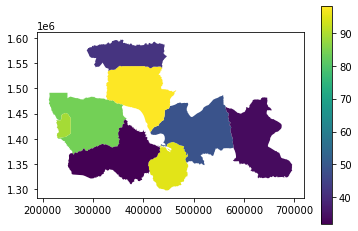

In [21]:
# Result plotting
province_20_100.plot(column='pop_km2', legend=True, cmap='viridis');

Congratulation! Now we have analyzed the shapefile data for first time in Python and plot the result perfectly. Isn't it interesting ?? 

Anyway, it's not yet enough. Let's learn how to export our result as a shapefile.

#### 1.c. Exporting Shapefile and GeoJSON

In this section, we will learn how to write and export our result from Python.

Let's first export the result we analyzed above to a shapefile and a GeoJSON file. When exporting, make sure it's a geopandas dataframe with a correct projection. Because we have defined projection already, so we only just export it using `.to_file()`

In [22]:
# Confirm the crs of result that we want to export
province_20_100.crs

'EPSG:32648'

In [23]:
# Drop column in khmer langugage to avoid error due to unicode
province_20_100 = province_20_100.drop(['province_k'], axis=1)

In [24]:
# Export result as a shapefile
outfp = 'result/province_20_100.shp'
province_20_100.to_file(outfp, driver='Shapefile') # sometimes, you don't need to write driver='Shapefile'.

In [25]:
# Export result as a GeoJSON
outfp = 'result/province_20_100.json'
province_20_100.to_file(outfp, driver='GeoJSON')

➡ We finally exported our result into shapefile and geojson file. So what's the difference? How about checking the font within column 'province_k' and also the number of files created in result folder?

---

### 2. Map Projection

**Map projection** is a concept of tranforming points from three-dimensional Earth's surface (3D) into plane surface (2D). Whereas, a **coordinate reference system (CRS)** defines how the two-dimensional map relates to real places on the earth, and it is a very important information for analyzing a geodataframe in Python. Deciding the type of map projection and which CRS to use depends on the regional extent of the area you want to work in and on the analysis you want to do.

When working on real data, sometimes you might have problem with CRS difference (i.e. one might have coordinates in meter, while the other in decimal degrees). In this case, CRS can be reprojected easily in Python to make all coordinates compatible. After all layers have the same CRS, you will be able to analyze the spatial relationship between layers correctly, for example, when making a clip, union, interection, difference, or other type of analysis.


You can find a lot of information and lists of available coordinate reference systems from:

* [www.arcgis.com](https://www.arcgis.com/apps/MapJournal/index.html?appid=31484c80dba54a058369dfb8e9ced549)
* www.spatialreference.org
* www.proj4.org
* www.mapref.org

In analysis in Python or GIS applications, geospatial data (i.e. vector or raster files) should always contain information about coordinate reference system. As for shapefile, this information can be found in `.prj` -file, whereas other type of data such as GeoJSON or Raster files, the projection information is already stored in its metadata (of course if the files is properly projected). 

When using Geopandas to read the data into `GeoDataFrame`, the information about projection is stored in `.crs` attribute of the GeoDataFrame. 

- Now, let's work on projection of provincial census data and start by checking the `.crs`:

In [26]:
# Import necessary modules
import geopandas as gpd

# Set filepath
fp = "data/provisional_census2019/provisional_census2019.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

**Check coordinate reference system (CRS)**

In [27]:
# Check the coordinate reference system
data.crs

{'init': 'epsg:32648'}

In [28]:
type(data.crs)

dict

This is how data's crs is stored in GeoDataFrames with the class type `pyproj` which is a cartographic projections and coordinate transformations library. As you can see, the crs code is `EPSG:32648` which belongs to the WGS 84 /UTM zone 48N coordinate system (i.e. coordinates are in metre both East and North). The EPSG stands for (*European Petroleum Survey Group*) and tells us the code about the coordinate system of dataset.

**Re-project coordinate reference system**

In [29]:
data['geometry'].tail()

20    POLYGON ((569781.983 1358558.625, 570417.373 1...
21    POLYGON ((644221.694 1481668.343, 644419.819 1...
22    POLYGON ((663909.945 1476792.235, 664134.383 1...
23    POLYGON ((773959.354 1625122.155, 774046.041 1...
24    POLYGON ((666331.270 1613878.300, 666441.020 1...
Name: geometry, dtype: geometry

In [30]:
# Let's make a copy of our data
orig_crs = data.copy().drop(['province_k'], axis=1)

# Re-project from EPSG:32648 to EPSG:4326 
new_crs = orig_crs.to_crs(epsg=4326)

# Check the new projection
new_crs['geometry'].tail()

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


20    POLYGON ((105.64171 12.28868, 105.64754 12.285...
21    POLYGON ((106.33200 13.39918, 106.33383 13.399...
22    POLYGON ((106.51352 13.35408, 106.51559 13.353...
23    POLYGON ((107.54387 14.68585, 107.54467 14.685...
24    POLYGON ((106.54411 14.59302, 106.54513 14.591...
Name: geometry, dtype: geometry

So now we have finally changed the projection of our data from [`epsg:32648`](https://www.spatialreference.org/ref/epsg/32648/) which covers the area in N hemisphere - 102°E to 108°E -  to [`epsg:4326`](https://www.spatialreference.org/ref/epsg/4326/) which covers the whole world.

**Check the difference of projection in plot**

Let's finding out what happened when we changed the projection from one to another by plotting our data with original crs and new crs.

In [31]:
# Import necessary module
import matplotlib.pyplot as plt

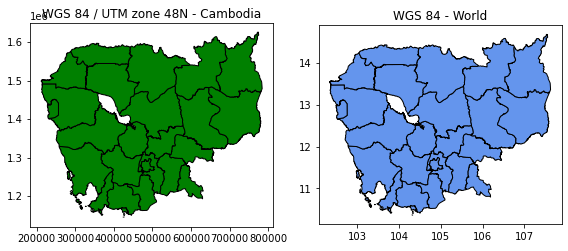

In [32]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Plot the data in WGS84-Cambodia projection
orig_crs.plot(ax=ax1, facecolor='green', edgecolor="black");

# Add title
ax1.set_title("WGS 84 / UTM zone 48N - Cambodia");

# Plot the one with WGS84-World projection
new_crs.plot(ax=ax2, facecolor='#6495ED', edgecolor="black");

# Add title
ax2.set_title("WGS 84 - World");

# Remove empty white space around the plot
plt.tight_layout()

Now, we can see that our new map's latitude and longitude have changed from meter to decimal degree. 

Let's save the data in new projection as a GeoJSON file:

In [33]:
# Define output path
outfp = 'result/cambodia_census_epsg4326.json'

# Save file
new_crs.to_file(outfp, driver='GeoJSON')

---

#### Practice

Let's learn how to calculate the distance from the centre of one province to another province. 

In this pratical exercise, we will use `cambodia_census_epsg4326.json` -file which we have just saved as our input data. The purpose is to calculate Euclidean distance from the centroid or center point of Phnom Penh to that of all provinces, Cambodia. After that, we find what provinces are near and far from Phnom Penh city.

**Hint**: 
- `.centroid` for calculating the centroid of a polygon
- `.distance()` for calculating the distance from one point to another

Back to shapely documentation for details about how to use these fuciton: [Shapely](https://shapely.readthedocs.io/en/stable/manual.html)

In [34]:
# Import necessary module
import geopandas as gpd
import matplotlib.pyplot as plt

In [35]:
# import our input data from result folder
fp = 'result/cambodia_census_epsg4326.json'
df = gpd.read_file(fp)  

df.head(3)

,ogc_fid,pro_code,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry
0,1,4,Kampong Chhnang,122925.0,251895.0,274037.0,525932.0,4.3,5521,95,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((104.45035 12.51519, 104.44859 ..."
1,2,8,Kandal,273111.0,580129.0,615418.0,1195547.0,4.4,3179,376,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((104.82759 11.88065, 104.82928 11.878..."
2,3,12,Phnom Penh,399203.0,1039192.0,1090179.0,2129371.0,5.3,679,3136,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((104.92232 11.73615, 104.92428 11.736..."


If we take a look at the latitude and longtitude of our coordinate, they are still in decimal degree which is not appropriate format for calculating distance in meter. Therefore, it's better to convert this crs to another type of crs with latitude and longitude in meter. Do you remember what crs should be used for this data?

Now, let's work on re-projecting our data:

In [36]:
# check the coordinates of our data
df.crs

{'init': 'epsg:4326'}

In [37]:
# change the coordinates to Cambodia coordinate system
df_new_crs = df.to_crs(epsg=32648)

# check new coordinate system
df_new_crs.crs

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:32648', 'no_defs': True}

In [38]:
# Let's create a column for storing the centroid result
df_new_crs['centroid'] = None

# calculate the centroid 
centroid = df_new_crs.centroid

# add centroid result to the centroid column
df_new_crs['centroid'] = centroid

# Let's check our result
df_new_crs.head(3)

,ogc_fid,pro_code,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry,centroid
0,1,4,Kampong Chhnang,122925.0,251895.0,274037.0,525932.0,4.3,5521,95,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((440280.561 1383585.909, 440090...",POINT (452120.014 1344277.437)
1,2,8,Kandal,273111.0,580129.0,615418.0,1195547.0,4.4,3179,376,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((481223.477 1313362.233, 481407.227 1...",POINT (501957.039 1262761.786)
2,3,12,Phnom Penh,399203.0,1039192.0,1090179.0,2129371.0,5.3,679,3136,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((491536.140 1297379.094, 491748.953 1...",POINT (485297.045 1278224.175)


Let's make an overview plot to clarify what we will do next

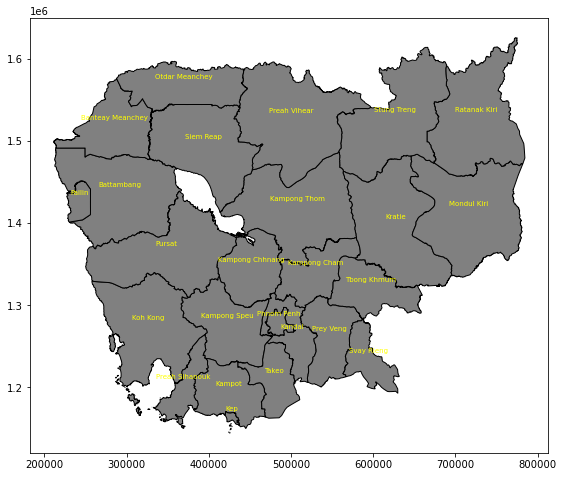

In [39]:
# Make subplots that are next to each other
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the geometry and the centroid
df_new_crs['geometry'].plot(ax=ax, facecolor = 'grey', edgecolor="black")

# Add label name of each polygon
for i in range(len(df_new_crs)):
    ax.text(df_new_crs["centroid"][i].x,
            df_new_crs["centroid"][i].y+9000,
            df_new_crs["provinces"][i],
            horizontalalignment='center',
            color='yellow',
            fontsize=7)
plt.show();

Next, our goal is to calculate the Euclidean distance from the center of Phnom Penh to all provinces. To do that, we need to firstly create a centroid of Phnom Penh and then calculate the distance from that centroid to another centroid of polygon representing the boundary of a province. Importantly, we need to make a loop for calculating one by one polygon and store result of each calculation in an list. 

Let's get started:

In [40]:
# Extracting centroid of Phnom Penh
pp_centroid = df_new_crs.loc[df_new_crs['provinces'] == 'Phnom Penh']

# Remove the row of Phnom Penh from dataframe because we don't want to calculate its own distance (of course it's 0.0.)
df_new_crs.drop(df_new_crs.index[df_new_crs['provinces'] == 'Phnom Penh'], inplace = True)
df_new_crs = df_new_crs.reset_index()  # reset index of data frame

**Create a loop calculation**

In [41]:
# Create a list for stroing result
distance = []

# Create a loop to calculate each row of dataframe
for i in range(len(df_new_crs)):
    
    # calculate distance from phnom penh to another province
    distance_from_pp = pp_centroid['centroid'].values[0].distance(df_new_crs['centroid'][i])
    
    # convert distance from meter to kilometer
    distance_in_km = distance_from_pp/1000
    
    # store each result in the list
    distance.append(distance_in_km)

In [42]:
# Let's create a column and store the distance result
df_new_crs['distance'] = distance

# Let's check our result
df_new_crs.head(3)

,index,ogc_fid,pro_code,provinces,households,males,females,total,house_size,area_km2,pop_km2,reference,geometry,centroid,distance
0,0,1,4,Kampong Chhnang,122925.0,251895.0,274037.0,525932.0,4.3,5521,95,Provisional_Population_Census__00.06.2019.pdf,"MULTIPOLYGON (((440280.561 1383585.909, 440090...",POINT (452120.014 1344277.437),73.917175
1,1,2,8,Kandal,273111.0,580129.0,615418.0,1195547.0,4.4,3179,376,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((481223.477 1313362.233, 481407.227 1...",POINT (501957.039 1262761.786),22.729735
2,3,4,14,Prey Veng,227008.0,501346.0,556082.0,1057428.0,4.7,4883,217,Provisional_Population_Census__00.06.2019.pdf,"POLYGON ((536011.301 1311635.984, 536169.301 1...",POINT (546308.957 1259850.296),63.718544


In [43]:
# minimum distance
min_distance = df_new_crs['distance'].min()
# maximum distance
max_distance = df_new_crs['distance'].max()

print(min_distance, 'km')
print(max_distance, 'km')

22.729735303077444 km
345.3761963080783 km


**Nearest and furthest provinces from Phnom Penh**

In [44]:
# get the name of province of max and min distance
min_province = df_new_crs['provinces'].loc[df_new_crs['distance'].idxmin()]
max_province = df_new_crs['provinces'].loc[df_new_crs['distance'].idxmax()]

*Note: check how to use [.idxmin()](https://www.kite.com/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python) or [idxmax()](https://www.kite.com/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python)* 

In [45]:
print('The nearest province to Phnom Penh is', min_province, 'Province with distance of {dist:.3f} km.'.format(dist=min_distance)) 
print('The furthest province to Phnom Penh is', max_province, 'Province with distance of {dist:.3f} km.'.format(dist=max_distance))

The nearest province to Phnom Penh is Kandal Province with distance of 22.730 km.
The furthest province to Phnom Penh is Ratanak Kiri Province with distance of 345.376 km.


#### Others

**Reading KML files**

The way to read KML files is quite similar to how we read a Shapefile with GeoPandas. The only difference is that we have to enable the KML-driver as it's not enabled by default. KML file formats can be read by using the Python library `Geopandas` and `Fiona`. First method can done with this method: [Read a KML File into a GeoPandas DataFrame](https://docs.astraea.earth/hc/en-us/articles/360043923831-Read-a-KML-File-into-a-GeoPandas-DataFrame)

In [46]:
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

Enable the KML-driver by passing the fiona's supported driver of KML

In [47]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

Now, we have enabled the KML-driver, so let's read the kml file:

In [48]:
data_kml = gpd.read_file('data/provisional_census2019/provisional_census2019.kml', driver='KML')
data_kml.head()

,Name,Description,geometry
0,,,"MULTIPOLYGON (((104.45035 12.51519, 104.44859 ..."
1,,,"MULTIPOLYGON (((104.82759 11.88065, 104.82928 ..."
2,,,"MULTIPOLYGON (((104.92232 11.73615, 104.92428 ..."
3,,,"MULTIPOLYGON (((105.33064 11.86490, 105.33209 ..."
4,,,"MULTIPOLYGON (((105.80715 11.59858, 105.80925 ..."


In [49]:
type(data_kml)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

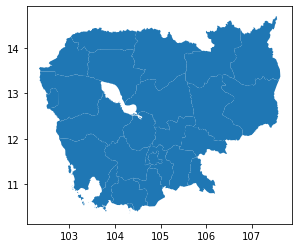

In [50]:
data_kml.plot()

From the geodataframe that we read from kml-file, we can see clearly that there are only 3 columns (i.e. Name, Description, and geometry) while other columns are missing. This is the disadvantage of reading KML-file in Python because KML-files mostly contain unsupported data structures, nested folder, etc., hence, I do not recommend to read data from KML. It's better to manually convert the KML file to other formart such as Shapefile or GeoJSON file using GIS application. So when we read shapefile or geojson, it will return a correct GeoDataFrame.

---